In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from os import path

data_dir = 'data/bank-transactions'
data_file = 'bank-transactions.csv'
data_path = path.join(data_dir, data_file)

df = pd.read_csv(data_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


#### Droppando nulos

In [3]:
df.dropna(inplace=True)

#### Transformando atributos

Transformando Date Of Birth (DOB) em idade

In [4]:
def takeYear(dob):
    return list( map(lambda x: int(x), dob.split('/')) )[-1]

def takeMonth(dob):
    return list( map(lambda x: int(x), dob.split('/')) )[1]

def takeDay(dob):
    return list( map(lambda x: int(x), dob.split('/')) )[0]
    
df['YearDOB'] = df['CustomerDOB'].apply(takeYear)
df['MonthDOB'] = df['CustomerDOB'].apply(takeMonth)
df['DayDOB'] = df['CustomerDOB'].apply(takeDay)

df[['DayDOB', 'MonthDOB', 'YearDOB']]

,DayDOB,MonthDOB,YearDOB
0,10,1,94
1,4,4,57
2,26,11,96
3,14,9,73
4,24,3,88
...,...,...,...
1048562,8,4,90
1048563,20,2,92
1048564,18,5,89
1048565,30,8,78


Validando dias, meses e anos

In [5]:
day_valid = (df['DayDOB'] <= 31) & (df['DayDOB'] >= 1)
month_valid = (df['MonthDOB'] <= 12) & (df['MonthDOB'] >= 1)
year_valid = (df['YearDOB'] <= 99) & (df['YearDOB'] >= 0)

day_valid.all(), month_valid.all(), year_valid.all()

(True, True, False)

Removendo as entradas com valores inválidos para ano

In [6]:
df = df[year_valid]
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),YearDOB,MonthDOB,DayDOB
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,94,1,10
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0,57,4,4
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0,96,11,26
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0,73,9,14
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,88,3,24
...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0,90,4,8
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0,92,2,20
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0,89,5,18
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0,78,8,30


Utilizando apenas o ano para decidir idade

In [7]:
df['CustomerAge'] = 2022 - df['YearDOB'].apply(lambda x: 1900 + x if x > 22 else 2000 + x)
df[['CustomerAge', 'YearDOB']]

,CustomerAge,YearDOB
0,28,94
1,65,57
2,26,96
3,49,73
4,34,88
...,...,...
1048562,32,90
1048563,30,92
1048564,33,89
1048565,44,78


Revendo dataset

In [8]:
df.head(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),YearDOB,MonthDOB,DayDOB,CustomerAge
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,94,1,10,28
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0,57,4,4,65
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0,96,11,26,26
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0,73,9,14,49
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,88,3,24,34


In [9]:
df.drop(columns=['TransactionID', 'CustomerID', 'CustomerDOB', 'YearDOB', 'MonthDOB', 'DayDOB'], inplace=True)

In [10]:
df.head(5)

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,28
1,M,JHAJJAR,2270.69,2/8/16,141858,27999.0,65
2,F,MUMBAI,17874.44,2/8/16,142712,459.0,26
3,F,MUMBAI,866503.21,2/8/16,142714,2060.0,49
4,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,34


#### Lidando com `TransactionDate`

Talvez possamos simplesmente criar três atributos, um para o dia da transação, um para o mês e outro para o ano.

In [11]:
df[['TransactionDay', 'TransactionMonth', 'TransactionYear']] = df['TransactionDate'].str.split('/', expand=True)
df.head(5)

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,TransactionDay,TransactionMonth,TransactionYear
0,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,28,2,8,16
1,M,JHAJJAR,2270.69,2/8/16,141858,27999.0,65,2,8,16
2,F,MUMBAI,17874.44,2/8/16,142712,459.0,26,2,8,16
3,F,MUMBAI,866503.21,2/8/16,142714,2060.0,49,2,8,16
4,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,34,2,8,16


Validando entradas para esses três atributos:

In [12]:
df['TransactionDay'] = df['TransactionDay'].astype('float64')
df['TransactionMonth'] = df['TransactionMonth'].astype('float64')
df['TransactionYear'] = df['TransactionYear'].astype('float64')

In [13]:
transday_valid = (df['TransactionDay'] <= 31) & (df['TransactionDay'] >= 1)
transmonth_valid = (df['TransactionMonth'] <= 12) & (df['TransactionMonth'] >= 1)
transyear_valid = (df['TransactionYear'] <= 99) & (df['TransactionYear'] >= 0)

transday_valid.all(), transmonth_valid.all(), transyear_valid.all()

(True, True, True)

Tudo certo. Então, é só droppar o atributo antigo.

In [14]:
df.drop(columns='TransactionDate', inplace=True)
df.head(5)

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),CustomerAge,TransactionDay,TransactionMonth,TransactionYear
0,F,JAMSHEDPUR,17819.05,143207,25.0,28,2.0,8.0,16.0
1,M,JHAJJAR,2270.69,141858,27999.0,65,2.0,8.0,16.0
2,F,MUMBAI,17874.44,142712,459.0,26,2.0,8.0,16.0
3,F,MUMBAI,866503.21,142714,2060.0,49,2.0,8.0,16.0
4,F,NAVI MUMBAI,6714.43,181156,1762.5,34,2.0,8.0,16.0


#### Separando hora, minuto e segundo da transação

In [15]:
df['TimeHours']   = df['TransactionTime'] // 10000
df['TimeMinutes'] = (df['TransactionTime'] // 100) - ((df['TransactionTime'] // 10000) * 100)
df['TimeSeconds'] = df['TransactionTime'] - (df['TransactionTime'] // 100) * 100

df.drop(columns='TransactionTime', inplace=True)

## COMEÇANDO A VISUALIZAÇÃO DOS DADOS

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985322 entries, 0 to 1048566
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CustGender               985322 non-null  object 
 1   CustLocation             985322 non-null  object 
 2   CustAccountBalance       985322 non-null  float64
 3   TransactionAmount (INR)  985322 non-null  float64
 4   CustomerAge              985322 non-null  int64  
 5   TransactionDay           985322 non-null  float64
 6   TransactionMonth         985322 non-null  float64
 7   TransactionYear          985322 non-null  float64
 8   TimeHours                985322 non-null  int64  
 9   TimeMinutes              985322 non-null  int64  
 10  TimeSeconds              985322 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 90.2+ MB


In [17]:
df.head(5)

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDay,TransactionMonth,TransactionYear,TimeHours,TimeMinutes,TimeSeconds
0,F,JAMSHEDPUR,17819.05,25.0,28,2.0,8.0,16.0,14,32,7
1,M,JHAJJAR,2270.69,27999.0,65,2.0,8.0,16.0,14,18,58
2,F,MUMBAI,17874.44,459.0,26,2.0,8.0,16.0,14,27,12
3,F,MUMBAI,866503.21,2060.0,49,2.0,8.0,16.0,14,27,14
4,F,NAVI MUMBAI,6714.43,1762.5,34,2.0,8.0,16.0,18,11,56


#### Salvando DataFrame expandido

In [18]:
data_file_new = 'bank-transactions-expanded.csv'
data_path_new = path.join(data_dir, data_file_new)

df.to_csv(data_path_new, index=False)

#### Separando só as cidades que usaremos no agrupamento

In [19]:
df = df[
    (df['CustLocation'] == 'MUMBAI') |
    (df['CustLocation'] == 'BANGALORE') |
    (df['CustLocation'] == 'NEW DELHI')
]

### CIDADES

In [20]:
df['CustLocation'].value_counts().head()

MUMBAI       97679
BANGALORE    77751
NEW DELHI    76380
Name: CustLocation, dtype: int64

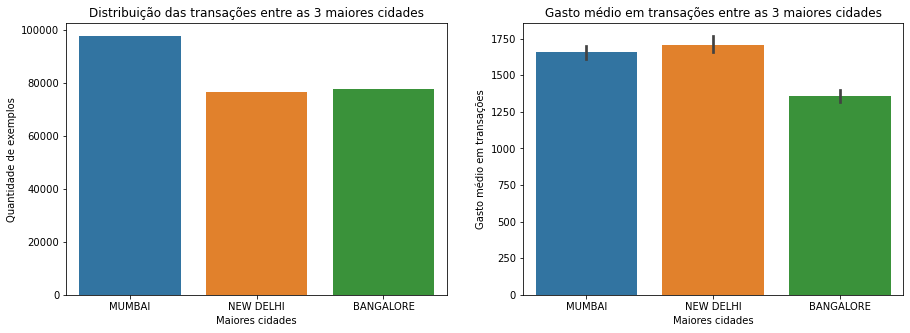

In [21]:
_, axs = plt.subplots(1, 2, figsize=(15, 5))

pcount = sns.countplot(data=df, x='CustLocation', ax=axs[0])
pbar   = sns.barplot(data=df, x='CustLocation', y='TransactionAmount (INR)', estimator=np.mean, ax=axs[1])

_ = pcount.set_title("Distribuição das transações entre as 3 maiores cidades")
_ = pcount.set_xlabel("Maiores cidades")
_ = pcount.set_ylabel("Quantidade de exemplos")

_ = pbar.set_title("Gasto médio em transações entre as 3 maiores cidades")
_ = pbar.set_xlabel("Maiores cidades")
_ = pbar.set_ylabel("Gasto médio em transações")

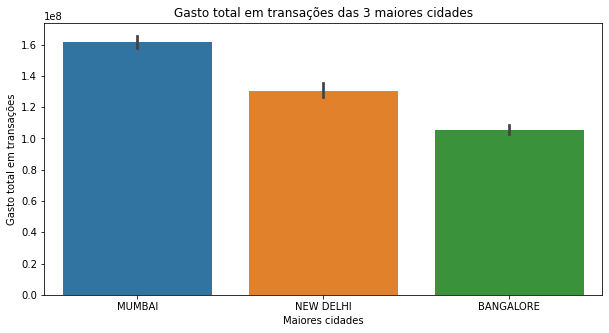

In [22]:
_, ax = plt.subplots(1, figsize=(10, 5))

pbar = sns.barplot(data=df, x='CustLocation', y='TransactionAmount (INR)', estimator=np.sum, ax=ax)
_ = pbar.set_title("Gasto total em transações das 3 maiores cidades")
_ = pbar.set_xlabel("Maiores cidades")
_ = pbar.set_ylabel("Gasto total em transações")

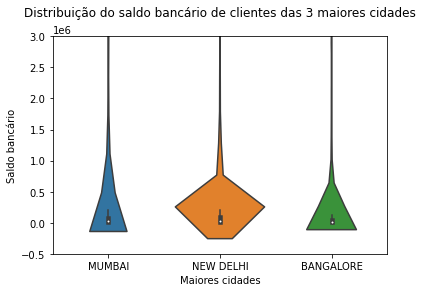

In [23]:
pviolin = sns.violinplot(
    data=df,
    x='CustLocation',
    y='CustAccountBalance'
)
_ = pviolin.set_title("Distribuição do saldo bancário de clientes das 3 maiores cidades", pad=20.)
_ = pviolin.set_xlabel("Maiores cidades")
_ = pviolin.set_ylabel("Saldo bancário")

_ = plt.ylim(-500000, 3000000)

## MESES

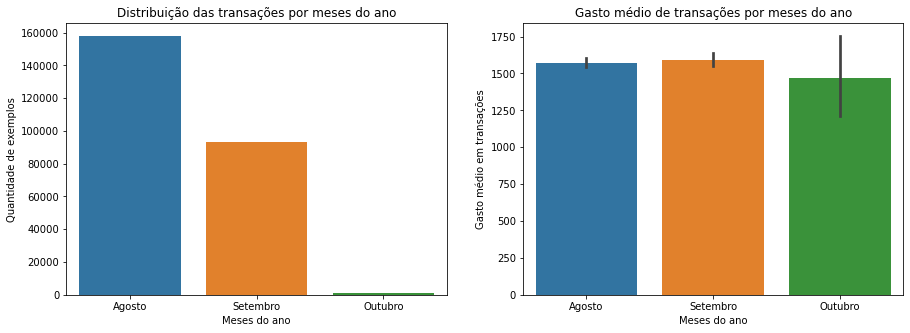

In [24]:
_, axs = plt.subplots(1, 2, figsize=(15, 5))

pcount = sns.countplot(
    data=df,
    x='TransactionMonth',
    ax=axs[0]
)
_ = pcount.set_title("Distribuição das transações por meses do ano")
_ = pcount.set_xlabel("Meses do ano")
_ = pcount.set_ylabel("Quantidade de exemplos")
_ = pcount.set_xticks([0., 1., 2.], ['Agosto', 'Setembro', 'Outubro'])

pbar = sns.barplot(
    data=df, 
    x='TransactionMonth', 
    y='TransactionAmount (INR)', 
    estimator=np.mean, 
    ax=axs[1]
)
_ = pbar.set_title("Gasto médio de transações por meses do ano")
_ = pbar.set_xlabel("Meses do ano")
_ = pbar.set_ylabel("Gasto médio em transações")
_ = pbar.set_xticks([0., 1., 2.], ['Agosto', 'Setembro', 'Outubro'])

In [25]:
qntd = len(df[ df['TransactionMonth'] == 10. ])
print(f"Quantidade de transações em outubro: {qntd}")

df[ df['TransactionMonth'] == 10. ]['TransactionDay'].value_counts()

Quantidade de transações em outubro: 886


21.0    885
16.0      1
Name: TransactionDay, dtype: int64

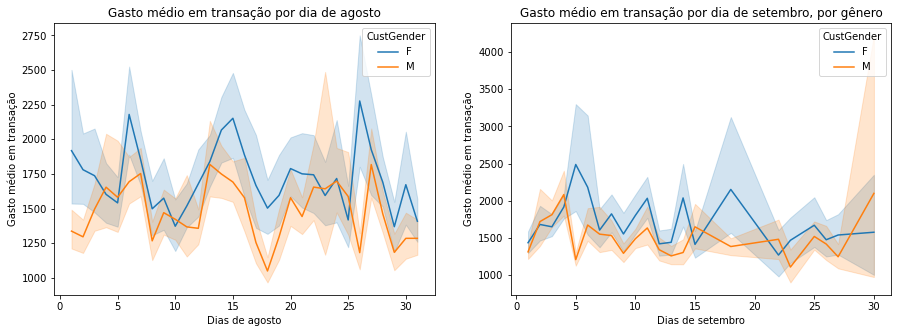

In [26]:
_, axs = plt.subplots(1, 2, figsize=(15, 5))

aux1 = df[ df['TransactionMonth'] == 8. ]
aux2 = df[ df['TransactionMonth'] == 9. ]

pline1 = sns.lineplot(
    data=aux1,
    x='TransactionDay',
    y='TransactionAmount (INR)',
    hue='CustGender',
    ax=axs[0]
)
_ = pline1.set_title("Gasto médio em transação por dia de agosto")
_ = pline1.set_xlabel("Dias de agosto")
_ = pline1.set_ylabel("Gasto médio em transação")

pline2 = sns.lineplot(
    data=aux2,
    x='TransactionDay',
    y='TransactionAmount (INR)',
    hue='CustGender',
    ax=axs[1]
)
_ = pline2.set_title("Gasto médio em transação por dia de setembro, por gênero")
_ = pline2.set_xlabel("Dias de setembro")
_ = pline2.set_ylabel("Gasto médio em transação")

## GÊNERO

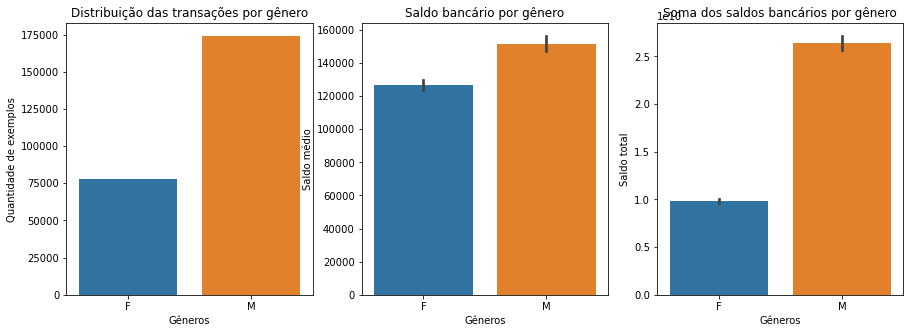

In [27]:
_, axs = plt.subplots(1, 3, figsize=(15, 5))

pcount = sns.countplot(
    data=df,
    x='CustGender',
    ax=axs[0]
)
_ = pcount.set_title("Distribuição das transações por gênero")
_ = pcount.set_xlabel("Gêneros")
_ = pcount.set_ylabel("Quantidade de exemplos")

pbar = sns.barplot(
    data=df, 
    x='CustGender', 
    y='CustAccountBalance', 
    estimator=np.mean, 
    ax=axs[1]
)
_ = pbar.set_title("Saldo bancário por gênero")
_ = pbar.set_xlabel("Gêneros")
_ = pbar.set_ylabel("Saldo médio")

pbar = sns.barplot(
    data=df, 
    x='CustGender', 
    y='CustAccountBalance', 
    estimator=np.sum, 
    ax=axs[2]
)
_ = pbar.set_title("Soma dos saldos bancários por gênero")
_ = pbar.set_xlabel("Gêneros")
_ = pbar.set_ylabel("Saldo total")

## GASTO POR TRANSAÇÃO

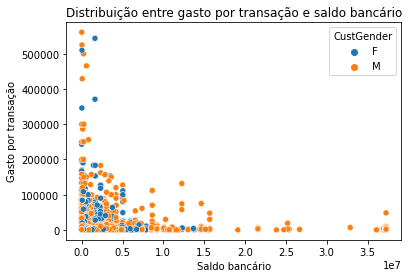

In [28]:
inr_limit = 0.6e6
acc_limit = 0.4e8

pscatter = sns.scatterplot(
    data=df[ (df['TransactionAmount (INR)'] < inr_limit) & (df['CustAccountBalance'] < acc_limit) ],
    #kind='scatter',
    x='CustAccountBalance',
    y='TransactionAmount (INR)',
    hue='CustGender'
)
_ = pscatter.set_title("Distribuição entre gasto por transação e saldo bancário")
_ = pscatter.set_xlabel("Saldo bancário")
_ = pscatter.set_ylabel("Gasto por transação")